# Data Cleaning

#### Measure of central tendency for each class

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hp_train.csv")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [3]:
null_var = df.isnull().sum()/df.shape[0] * 100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [4]:
drop_columns = null_var[null_var > 20].keys()
drop_columns

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [5]:
df_drop_col = df.drop(columns = drop_columns)
df_drop_col.shape

(1460, 76)

In [6]:
df_num = df_drop_col.select_dtypes(include=['int64','float64'])
df_num.shape

(1460, 38)

In [7]:
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [8]:
missing_var = ['LotFrontage','MasVnrArea','GarageYrBlt']
df_num[missing_var][df_num[missing_var].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0
31,NaN,0.0,1966.0
39,65.0,0.0,NaN
42,NaN,0.0,1983.0
43,NaN,0.0,1977.0
48,33.0,0.0,NaN


In [9]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [10]:
df[df.loc[:,'LotConfig'] == 'Inside']['LotFrontage'].replace(np.nan, df[df.loc[:,'LotConfig'] == 'Inside']['LotFrontage'].mean())

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

In [11]:
df_copy = df_num.copy()
for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig'] == var_class]['LotFrontage'].replace(np.nan, df[df.loc[:,'LotConfig'] == var_class]['LotFrontage'].mean()))

In [12]:
df_copy.isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [13]:
df_copy = df_num.copy()
missing_vars = ['LotFrontage','MasVnrArea','GarageYrBlt']
cat_vars = ['LotConfig', 'Exterior2nd', 'KitchenQual']
for cat_var, missing_var in zip(cat_vars, missing_vars):
    for var_class in df[cat_var].unique():
        df_copy.update(df[df.loc[:,cat_var] == var_class][missing_var].replace(np.nan, df[df.loc[:,cat_var] == var_class][missing_var].mean()))

In [14]:
df_copy[missing_vars].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

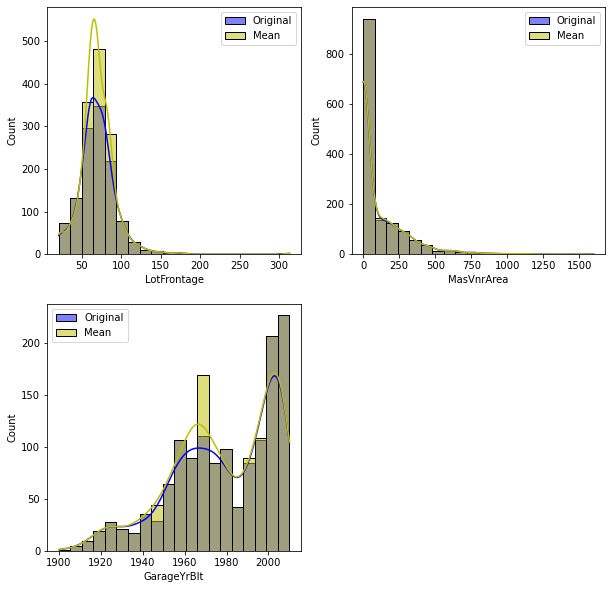

In [15]:
plt.figure(figsize = (10,10))
for i, var in enumerate(missing_vars):
    plt.subplot(2,2,i+1)
    sns.histplot(df_num[var], bins = 20, kde = True, color = 'b', label = 'Original')
    sns.histplot(df_copy[var], bins = 20, kde = True,color = 'y', label = 'Mean' )
    plt.legend()

In [16]:
df_copy2 = df_num.copy()
missing_vars = ['LotFrontage','MasVnrArea','GarageYrBlt']
cat_vars = ['LotConfig', 'Exterior2nd', 'KitchenQual']
for cat_var, missing_var in zip(cat_vars, missing_vars):
    for var_class in df[cat_var].unique():
        df_copy2.update(df[df.loc[:,cat_var] == var_class][missing_var].replace(np.nan, df[df.loc[:,cat_var] == var_class][missing_var].median()))

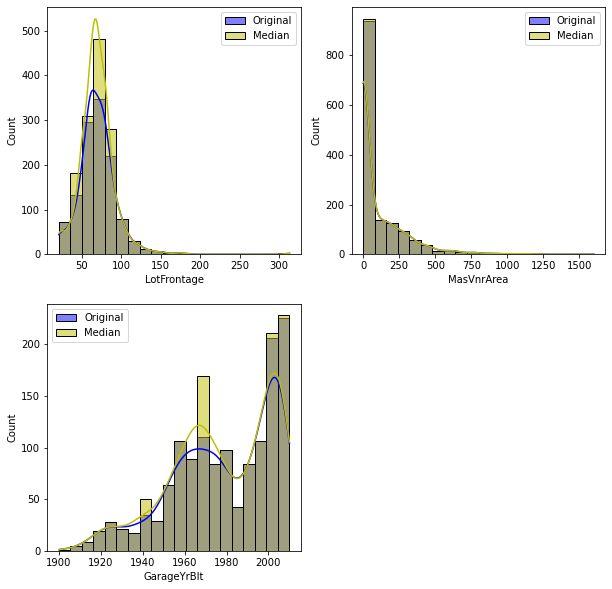

In [17]:
plt.figure(figsize = (10,10))
for i, var in enumerate(missing_vars):
    plt.subplot(2,2,i+1)
    sns.histplot(df_num[var], bins = 20, kde = True, color = 'b', label = 'Original')
    sns.histplot(df_copy2[var], bins = 20, kde = True,color = 'y', label = 'Median' )
    plt.legend()

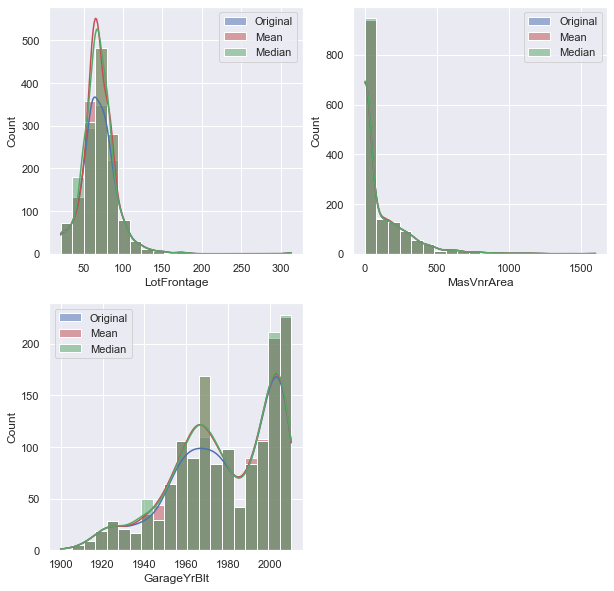

In [18]:
plt.figure(figsize = (10,10))
sns.set()
for i, var in enumerate(missing_vars):
    plt.subplot(2,2,i+1)
    sns.histplot(df_num[var], bins = 20, kde = True, color = 'b', label = 'Original')
    sns.histplot(df_copy[var], bins = 20, kde = True,color = 'r', label = 'Mean' )
    sns.histplot(df_copy2[var], bins = 20, kde = True,color = 'g', label = 'Median' )
    plt.legend()

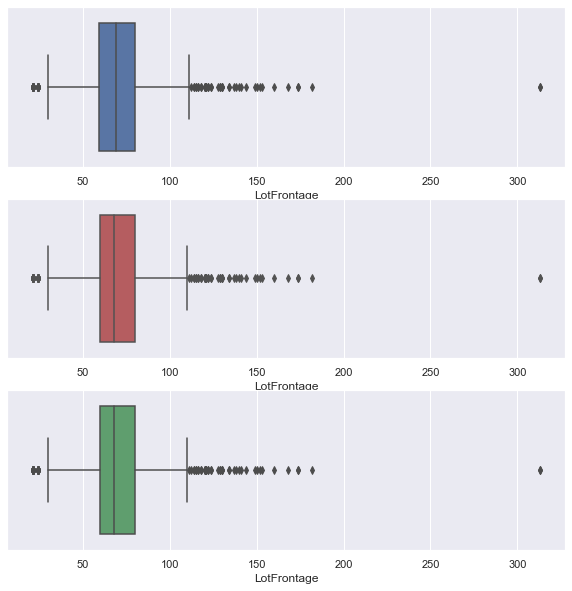

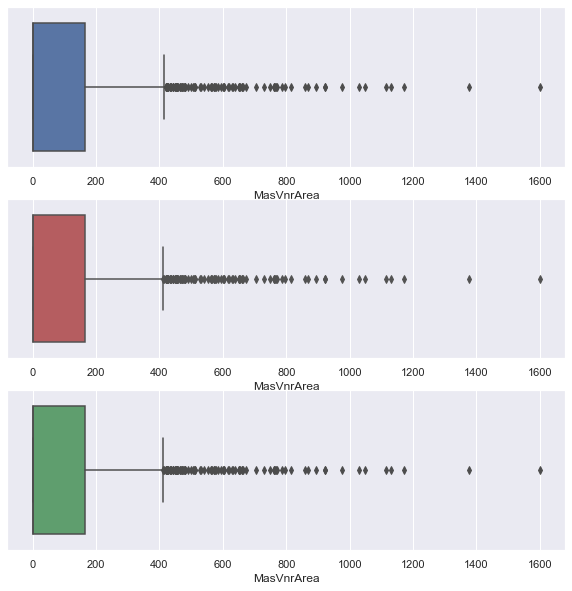

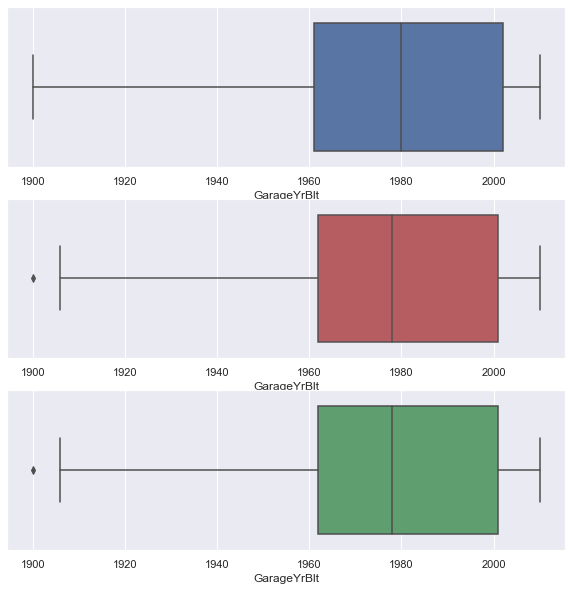

In [19]:
for i,var in enumerate(missing_vars):
    plt.figure(figsize = (10,10))
    plt.subplot(311)
    sns.boxplot(x=df_num[var])
    plt.subplot(312)
    sns.boxplot(x=df_copy[var], color = 'r')
    plt.subplot(313)
    sns.boxplot(x=df_copy2[var], color = 'g')